In [1]:
import geopandas as gpd
import pandas as pd

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


## Fast Foods

In [2]:
df = pd.read_csv('Datafiniti_Fast_Food_Restaurants.csv')

In [3]:
df.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


## First Look at the dataset

In [4]:
# number of cities
len(df.city.unique())

2764

In [4]:
#how many fast foods
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories', 'city',
       'country', 'keys', 'latitude', 'longitude', 'name', 'postalCode',
       'province', 'sourceURLs', 'websites'],
      dtype='object')

In [6]:
# most common brand

In [5]:
df_grouped_name = df.groupby(by=['name']).agg('count').sort_values('id', ascending = False)
df_grouped_name.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,postalCode,province,sourceURLs,websites
name,,,,,,,,,,,,,,
McDonald's,1898,1898,1898,1898,1898,1898,1898,1898,1898,1898,1898,1898,1898,1898
Taco Bell,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032
Burger King,833,833,833,833,833,833,833,833,833,833,833,833,833,833
Subway,776,776,776,776,776,776,776,776,776,776,776,776,776,776
Arby's,663,663,663,663,663,663,663,663,663,663,663,663,663,663


In [7]:
# least common brand
df_grouped_name = df.groupby(by=['name']).agg('count').sort_values('id')
df_grouped_name.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,postalCode,province,sourceURLs,websites
name,,,,,,,,,,,,,,
iSushi,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Kow Thai Take Out,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Kosta's Gyros,1,1,1,1,1,1,1,1,1,1,1,1,1,1
King of Wings,1,1,1,1,1,1,1,1,1,1,1,1,1,1
King Wah,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
counts_city = list(df.groupby(by=["city"]).agg('count').address)
cities = df.city

In [9]:
to_sort = df.groupby(by=["city"]).agg('count')
values_counts = list(to_sort.id)
print(len(values_counts), len(cities))

2764 10000


In [10]:
to_sort.sort_values('id', ascending = False)

,id,dateAdded,dateUpdated,address,categories,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
city,,,,,,,,,,,,,,
Houston,107,107,107,107,107,107,107,107,107,107,107,107,107,107
Las Vegas,82,82,82,82,82,82,82,82,82,82,82,82,82,82
Phoenix,78,78,78,78,78,78,78,78,78,78,78,78,78,78
Columbus,72,72,72,72,72,72,72,72,72,72,72,72,72,72
Dallas,66,66,66,66,66,66,66,66,66,66,66,66,66,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Farmerville,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Farmingdale,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Fennville,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [11]:
cities = list(df.groupby(by=["city"]).groups.keys())

In [12]:
p = pd.DataFrame(data = {'Name': cities, 'Counts': values_counts})

In [13]:
p.head()

,Name,Counts
0,Aberdeen,6
1,Abilene,6
2,Abingdon,3
3,Abington,1
4,Acton,2


In [14]:
#normalize to population count
#clusters of networks

In [15]:
df_2 = pd.read_csv('uscities.csv')

In [16]:
p.head()

,Name,Counts
0,Aberdeen,6
1,Abilene,6
2,Abingdon,3
3,Abington,1
4,Acton,2


In [17]:
#building a dictionary
dictionary_cities_pop = {}
dictionary_metric = {}
dictionary_metric_pop = {}
for c in cities:
    population = list(df_2[df_2.city == c].population)
    fast_food_count = list(p[p.Name == c].Counts)
    if population != [] and fast_food_count != []:
        dictionary_cities_pop[c] = [population[0], fast_food_count[0]]
        dictionary_metric[c] =  fast_food_count[0] / population[0]
        dictionary_metric_pop[c] = [fast_food_count[0] / population[0],population[0]]

In [18]:
dictionary_cities_pop['New York']

[18713220, 28]

In [19]:
len(dictionary_cities_pop)

2596

In [20]:
pd_metric = pd.DataFrame(data = {'Cities': dictionary_metric.keys(), 'Metric': dictionary_metric.values()})

In [28]:
d = pd_metric.sort_values(by=['Metric'], ascending = False).head(20)
d.head()

,Cities,Metric
735,Encino,0.038462
961,Guilford,0.027397
1193,Kingdom City,0.023077
1102,Hyannis,0.016304
2507,Whitestone,0.015625


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Encino'),
  Text(1, 0, 'Guilford'),
  Text(2, 0, 'Kingdom City'),
  Text(3, 0, 'Hyannis'),
  Text(4, 0, 'Whitestone'),
  Text(5, 0, 'Cheshire'),
  Text(6, 0, 'Percival'),
  Text(7, 0, 'Jamaica'),
  Text(8, 0, 'Ventura'),
  Text(9, 0, 'Harrold'),
  Text(10, 0, 'Redford'),
  Text(11, 0, 'Curran'),
  Text(12, 0, 'San Pedro'),
  Text(13, 0, 'Pemberton'),
  Text(14, 0, 'Maynard'),
  Text(15, 0, 'Spring Branch'),
  Text(16, 0, 'White Lake'),
  Text(17, 0, 'Aynor'),
  Text(18, 0, 'Minocqua'),
  Text(19, 0, 'Sawyer')])

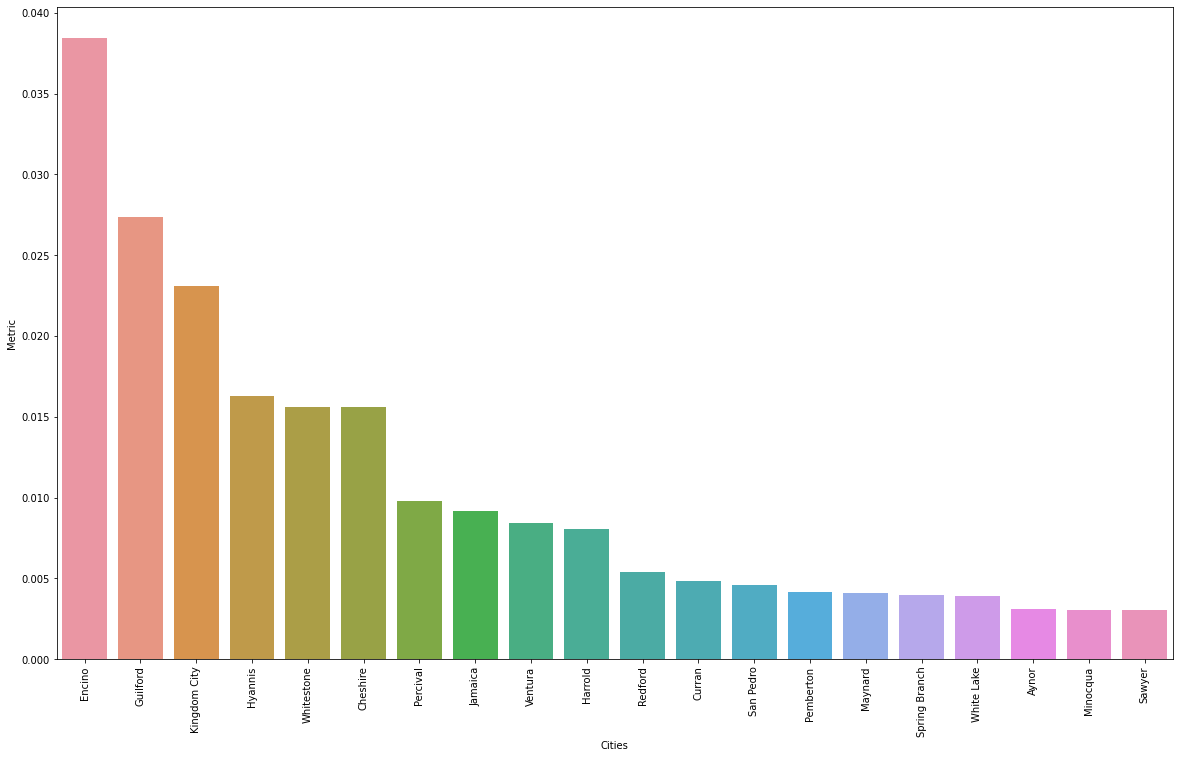

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,12))
sns.barplot(x=d.Cities, y= d.Metric , data = d)
plt.xticks(rotation=90)

In [32]:
#scatterplot of population versus fast foods metric
list_pops = [v[1] for v in dictionary_metric_pop.values()]
list_metrics = [v[0] for v in dictionary_metric_pop.values()]

In [33]:
pd_metric_pop = pd.DataFrame(data = {'Cities': dictionary_metric_pop.keys(),'Population':list_pops, 'Metric':list_metrics})

In [34]:
pd_metric_pop.head()

,Cities,Population,Metric
0,Aberdeen,29609,0.000203
1,Abilene,123420,0.000049
2,Abingdon,7867,0.000381
3,Acton,7232,0.000277
4,Acworth,22818,0.000219


<AxesSubplot:xlabel='Population', ylabel='Metric'>

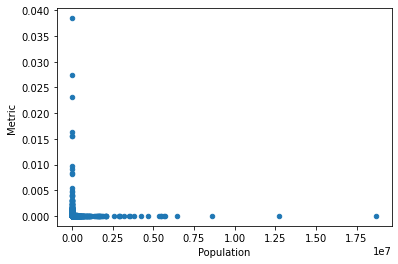

In [35]:
#smaller cities seem to have more fastfood locations
pd_metric_pop.plot.scatter(x = 'Population', y = 'Metric')

In [36]:
#scatterplot counts vs. population
list_population = [v[0] for v in dictionary_cities_pop.values()]
list_counts = [v[1] for v in dictionary_cities_pop.values()]
pd_counts_pop = pd.DataFrame(data = {'Population': list_population, 'Counts': list_counts})

<AxesSubplot:xlabel='Population', ylabel='Counts'>

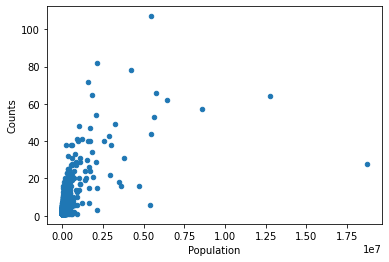

In [37]:
pd_counts_pop.plot.scatter(x = 'Population', y = 'Counts')

In [38]:
#most cities are smaller (only a few right of 500 thousand)

## Testing for Normality 

In [39]:
#statistical analysis on the type of cities by size: first see if distributions are normal or not

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Counts', ylabel='Density'>

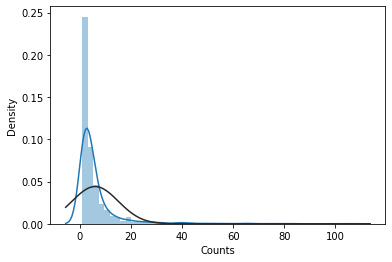

In [43]:
import seaborn as sns
from scipy import stats
sns.distplot(larger_towns.Counts, fit = stats.norm)

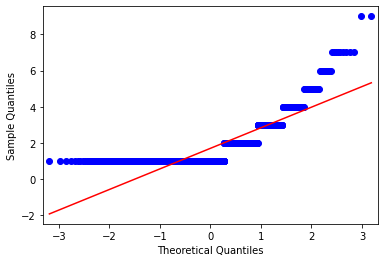

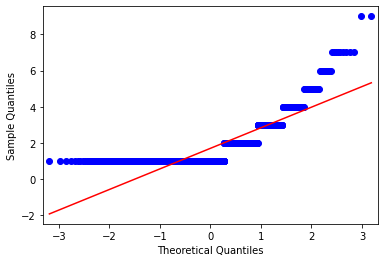

In [45]:
#test for normality: not normal
from statsmodels.graphics.gofplots import qqplot
qqplot(small_towns.Counts, line = 's')

In [43]:
from scipy.stats import shapiro
statistic,p = shapiro(larger_towns.Counts)
print(f'P-value: {p :<.3f}')

#For a threshold of 5% (alpha)
if p > 0.05:
    print(f'Sample looks Gaussian (fail to reject H0)')
else:
    print(f'Sample does not look gaussian ( reject H0)')

P-value: 0.000
Sample does not look gaussian ( reject H0)


## Differences between small and large towns: Mann-Whitney Test

In [46]:
pd_counts_pop.head()

,Population,Counts
0,29609,6
1,123420,6
2,7867,3
3,7232,2
4,22818,5


In [47]:
# sorting and dividing the samples
sorted_pd_counts_pop = pd_counts_pop.sort_values('Population')
small_towns = pd_counts_pop[pd_counts_pop.Population <= 25000]
larger_towns = pd_counts_pop[pd_counts_pop.Population > 25000]

In [48]:
from scipy.stats import mannwhitneyu
mannwhitneyu(small_towns.Counts, larger_towns.Counts)

MannwhitneyuResult(statistic=369347.0, pvalue=1.222791742378143e-146)

In [50]:
#For a threshold of 5% (alpha)
statistic,p = mannwhitneyu(small_towns.Counts, larger_towns.Counts)
if p > 0.05:
    print(f'Samples are not different (fail to reject H0)')
else:
    print(f'Samples are different ( reject H0)')

Samples are different ( reject H0)


In [48]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

<AxesSubplot:>

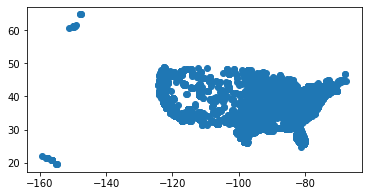

In [49]:
gdf.plot()

## Healthy Food Access: USA

In [64]:
pd_food = pd.read_csv('StateAndCountyData.csv')

In [65]:
pd_food.head(10)

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255
5,1001,AL,Autauga,LACCESS_LOWI10,5344.427472
6,1001,AL,Autauga,LACCESS_LOWI15,6543.676824
7,1001,AL,Autauga,PCH_LACCESS_LOWI_10_15,22.439248
8,1001,AL,Autauga,PCT_LACCESS_LOWI10,9.793530
9,1001,AL,Autauga,PCT_LACCESS_LOWI15,11.991125


In [66]:
list_states = list(pd_food.State)
for i in range(len(list_states)):
    list_states[i] = list_states[i].replace(' ', '')

In [67]:
pd_food['State'] = list_states
pd_food.State.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [68]:
pd_food.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


In [69]:
#which state has lowest average access to grocery food
pd_food_10 = pd_food[pd_food.Variable_Code == 'LACCESS_POP10']

In [70]:
pd_food_10.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
41,1003,AL,Baldwin,LACCESS_POP10,35210.814080
82,1005,AL,Barbour,LACCESS_POP10,5722.305602
123,1007,AL,Bibb,LACCESS_POP10,1044.867327
164,1009,AL,Blount,LACCESS_POP10,1548.175559


In [93]:
food_grouped = pd_food_10.groupby(by=['State']).agg('mean')
food_grouped.sort_values('Value', ascending = False).head(10)

,FIPS,Value
State,,
MA,25014.000000,132915.690119
CT,9008.000000,129043.381885
NJ,34021.000000,105244.267563
AZ,4013.866667,81267.922268
CA,6058.000000,79221.516190
DE,10003.000000,76734.408877
HI,15005.000000,68367.832320
FL,12067.910448,62608.459665
RI,44005.000000,55031.933032


In [94]:
#normalized by population count

In [95]:
pd_food_2 = pd.read_csv('SupplementalDataCounty.csv')
pops = list(pd_food_2[pd_food_2.Variable_Code == 'Population_Estimate_2014'].groupby(by=['State']).agg('sum').Value)
pops = [pops[0]] + [pops[len(pops) - 2]] + pops[1:len(pops) - 1]

In [96]:
e = list(pd_food.State.unique())

In [97]:
food_grouped['Population'] = pops
food_grouped['Metric'] = food_grouped.Value / food_grouped.Population

In [102]:
food_grouped.sort_values('Metric', ascending = False).head(10)

,FIPS,Value,Population,Metric
State,,,,
DE,10003.000000,76734.408877,932596,0.082280
RI,44005.000000,55031.933032,1056017,0.052113
HI,15005.000000,68367.832320,1414862,0.048321
CT,9008.000000,129043.381885,3594783,0.035897
AL,1067.000000,15304.357174,582548,0.026271
DC,11001.000000,16970.705650,662513,0.025616
NH,33010.000000,33527.939091,1333223,0.025148
MA,25014.000000,132915.690119,6763652,0.019651
AZ,4013.866667,81267.922268,6733840,0.012069
